<a href="https://colab.research.google.com/github/lipeng2021/-python1/blob/main/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E6%9C%BA%E5%AE%9E%E7%8E%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import torch
from IPython import display
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
import torch.optim as optim
FILENAME = './content/sample_data/lipeng'

In [2]:
mnist_train = torchvision.datasets.FashionMNIST(root=FILENAME,train=True,transform=transforms.ToTensor(),download=True)
mnist_test = torchvision.datasets.FashionMNIST(root=FILENAME,train=False,transform=transforms.ToTensor(),download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./content/sample_data/lipeng/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./content/sample_data/lipeng/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./content/sample_data/lipeng/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./content/sample_data/lipeng/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./content/sample_data/lipeng/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./content/sample_data/lipeng/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./content/sample_data/lipeng/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./content/sample_data/lipeng/FashionMNIST/raw



In [3]:
def set_svg_figure():
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  plt.rcParams['figure_figsize']=figsize

In [4]:
def get_fashion_mnist_labels(labels):
  text_labels = ['t-shirt','trouser','pullover','dress','coat','sandal','sneaker','bag','ankle','boot']
  return [text_labels[int(i)] for i in labels]

In [5]:
def show_fashion_mnist(images,labels):
  set_svg_figure()
  _,imgs = plt.subplots(1,len(images),figsize=(12,12))
  for img,figture,lbl in zip(imgs,images,labels):
    img.imshow(figture.view((28,28)).numpy())
    img.set_title(lbl)
    img.axes.get_xaxis().set_visible(True)
    img.axes.get_yaxis().set_visible(True)
  plt.show()

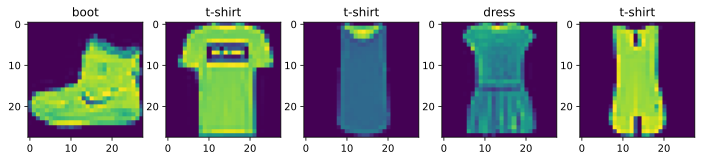

In [6]:
x =[]
y = []
for i in range(5):
  x.append(mnist_train[i][0])
  y.append(mnist_train[i][1])
show_fashion_mnist(x,get_fashion_mnist_labels(y))

读取数据

In [7]:
batch_size = 256
if sys.platform.startswith('win'):
  num_workers = 0
else:
  num_workers = 2
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size,shuffle=True,num_workers=num_workers)

初始化模型参数

In [8]:
num_inputs = 784
num_outputs = 10
num_hiddens = 256
w1 = torch.tensor(np.random.normal(0,0.01,(num_inputs,num_hiddens)),dtype=torch.float)
b1 = torch.zeros(num_hiddens,dtype=torch.float)
w2 = torch.tensor(np.random.normal(0,0.01,(num_hiddens,num_outputs)),dtype=torch.float)
b2 = torch.zeros(num_outputs,dtype=torch.float)
params = [w1,b1,w2,b2]
for param in params:
  param.requires_grad_(requires_grad=True)

定义激活函数

In [9]:
def relu(x):
  return torch.max(input=x,other=torch.tensor(0.0))

定义函数

In [10]:
def net(x):
  X = x.view((-1,num_inputs))
  H = relu(torch.matmul(X,w1)+b1)
  return torch.matmul(H,w2)+b2

定义损失函数

In [11]:
loss = torch.nn.CrossEntropyLoss() 

定义优化算法

In [12]:
def sgd(params,batch_size,lr):
  for param in params:
    param.data -=lr*param.grad/batch_size

训练模型

In [13]:
def evaluate_accuracy(data_iter,net):
  acc_sum=0.0
  n = 0
  for X,y in data_iter:
    acc_sum += (net(X).argmax(dim=1)==y).float().sum().item()
    n = y.shape[0]
    return acc_sum/n

In [16]:
num_epochs = 5
lr = 100.0
def train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,lr=None,params=None,optimizer=None):
  for epoch in range(num_epochs):
    train_l_sum=0.0
    train_acc_sum=0.0
    n = 0
    for X,y in train_iter:
      y_hat = net(X)
      l = loss(y_hat,y).sum()

      if optimizer is not None:
        optimizer.zero_grad()
      elif params is not None and params[0].grad is not None:
        for param in params:
          param.grad.data.zero_()

      l.backward()
      if optimizer is None:
        sgd(params,batch_size,lr)
      else:
        optimizer.step()
      train_l_sum += l.item()
      train_acc_sum = (net(X).argmax(dim=1)==y).float().sum().item()
      n += y.shape[0]
      test_acc_sum = evaluate_accuracy(test_iter,net)
    print('epoch %d,loss %.4f,trainacc %.3f,test acc %.3f'%(epoch+1,train_l_sum/n,train_acc_sum/n,test_acc_sum))


In [17]:
train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,lr,params)

epoch 1,loss 0.0014,trainacc 0.002,test acc 0.887
epoch 2,loss 0.0013,trainacc 0.002,test acc 0.879
epoch 3,loss 0.0013,trainacc 0.002,test acc 0.848
epoch 4,loss 0.0012,trainacc 0.002,test acc 0.840
epoch 5,loss 0.0012,trainacc 0.001,test acc 0.855


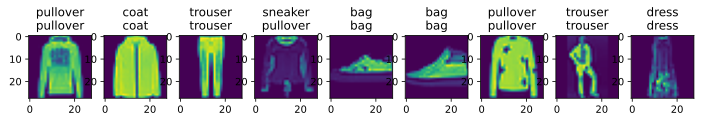

In [18]:
x,y = iter(test_iter).next()
true_labels = get_fashion_mnist_labels(y.numpy())
pred_labels = get_fashion_mnist_labels(net(x).argmax(dim=1).numpy())
title = [true+'\n'+pred for true,pred in zip(true_labels,pred_labels)]
show_fashion_mnist(x[0:9],title[0:9])